In [1]:
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt

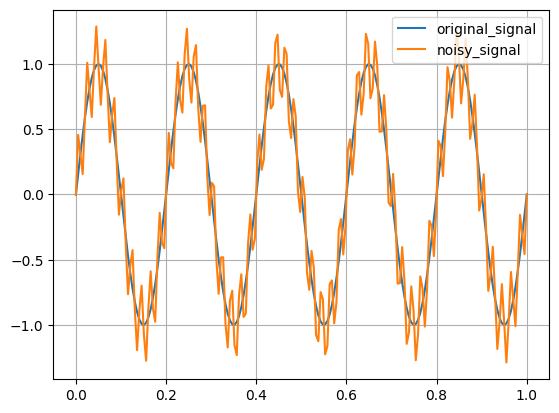

In [17]:
# sampling frequency
fs = 200

T = 1/fs

t = np.linspace(0,1,fs)

signal = np.sin(5 * 2*np.pi * t)
noisy_signal = signal + 0.3*np.sin(50 * 2*np.pi * t)

plt.plot(t,signal)
plt.plot(t,noisy_signal)
plt.legend(['original_signal','noisy_signal'])
plt.grid()
plt.show()

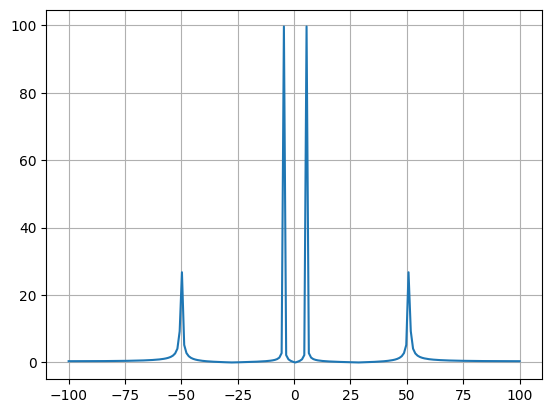

In [18]:
unfiltered_fourier_transform = scipy.fft.fft(noisy_signal)
N = len(unfiltered_fourier_transform)
# f_axis = np.linspace(-fs/2,fs/2,N)
f_axis = np.linspace(-fs/2, fs/2, N)
magnitude_spectrum = np.abs(scipy.fft.fftshift(unfiltered_fourier_transform))
plt.plot(f_axis,magnitude_spectrum)
plt.grid()

In [19]:
# design of the filter
fc = 15
k = 1#2/T
# prewarping
w_d = 2*np.pi*fc/fs
wa =k*np.tan(w_d/2)
a = (k*k) - (wa*k*np.sqrt(2)) + (wa*wa)
b = -2 + (2*wa*wa)
c = (k*k) + (wa*k*np.sqrt(2)) + (wa*wa)

A = -b/c
B = -a/c
C = (wa*wa)/c
D = (2*wa*wa)/c
E = (wa*wa)/c

filtered_signal = np.zeros_like(noisy_signal)
output = np.zeros(2)
input = np.zeros(2)

for i in range(len(noisy_signal)):
    filtered_signal[i] = A*output[1] + B*output[0] + C*noisy_signal[i] + D*input[1] + E*input[0]

    output[0] = output[1]
    output[1] = filtered_signal[i]

    input[0] = input[1]
    input[1] = noisy_signal[i]

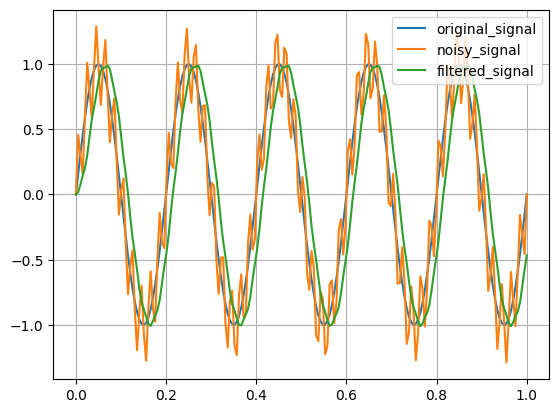

In [20]:
plt.plot(t,signal)
plt.plot(t,noisy_signal)
plt.plot(t,filtered_signal)
plt.legend(['original_signal','noisy_signal','filtered_signal'])
plt.grid()
plt.show()

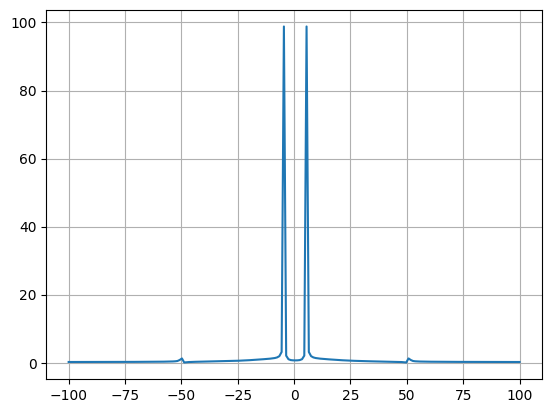

In [21]:
filtered_fourier_transform = scipy.fft.fft(filtered_signal)
N = len(filtered_fourier_transform)
# f_axis = np.linspace(-fs/2,fs/2,N)
f_axis = np.linspace(-fs/2, fs/2, N)
magnitude_spectrum = np.abs(scipy.fft.fftshift(filtered_fourier_transform))
plt.plot(f_axis,magnitude_spectrum)
plt.grid()